In [36]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F


In [4]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
# hyper-parameter

input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 32
lr = 0.001

In [6]:
# MNIST data

training_dataset = torchvision.datasets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = training_dataset, batch_size= batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size= batch_size, shuffle = False)

In [7]:
ex = iter(train_loader)

ex

In [10]:
samples, labels = ex.next()

In [24]:
samples[3][0][27]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [18]:
labels[18]

tensor(2)

In [26]:
samples.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

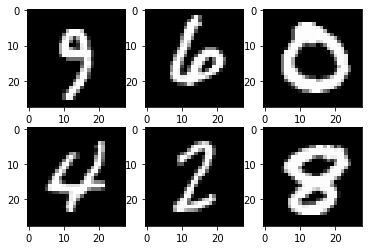

In [28]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap='gray')

plt.show()

In [29]:
for data in train_loader:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [31]:
x, y = data[0][3], data[1][3]

tensor(3)


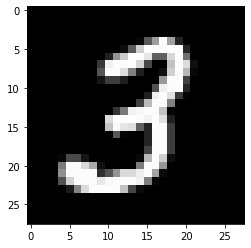

In [35]:
plt.imshow(x.view(28,28), cmap='gray')
print(y)

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size = num_classes):
        super().__init__() # initializes the parent class init method.
        # defining layers

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

        def forward(self, x):
            out = self.l1(x)
            out = self.relue(out)
            out = self.l2(out)

            #return F.log_softmax(out, dim = 1) -- if using softmax here
            return out


model = NeuralNet(input_size, hidden_size, num_classes)


#loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)


#training loop

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(train_loader):
